# Paul Unger

## Research question/interests
I'm interested in researching the ratio of how many expensive games get generally positive reviews as opposed to cheaper games to see if the extra money is worth it

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns

<AxesSubplot:xlabel='positive_ratings', ylabel='median_playtime'>

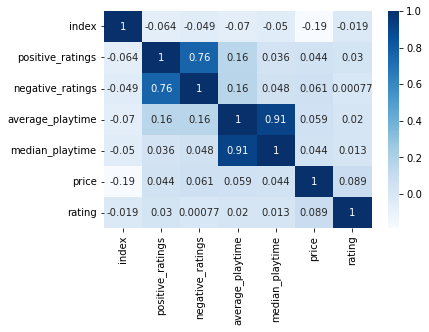

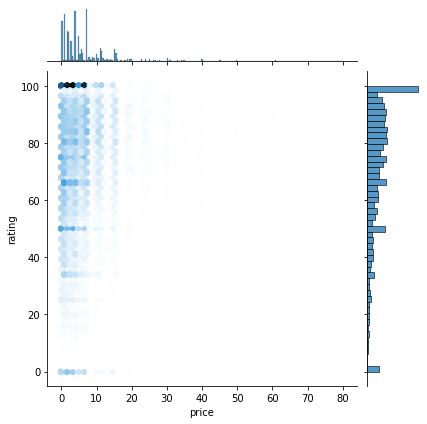

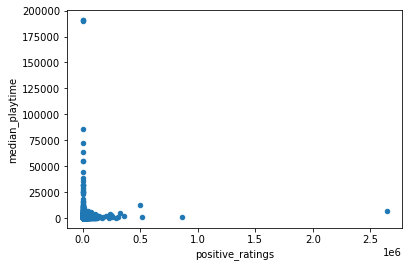

In [7]:
# Milestone 3 Task 1: EDA
df = pd.read_csv("../data/raw/steam.csv")

# drop unnecessary rows
dfc = df.drop(["appid", "release_date", "english", "developer", "publisher", "required_age", "platforms", "achievements"], axis=1)
dfc = dfc.drop(["name", "categories", "genres", "steamspy_tags", "owners"], axis=1)

# price has a ridiculous max, most likely an outlier. as most AAA games are $60-80, let's set a limit of $80 for games in this dataset
dfc = dfc[dfc["price"].between(0, 80)]

# drop rows with NaN (don't believe any such rows exist but it's a good precaution)
dfc = dfc.dropna(axis=0)
dfc = dfc.reset_index()
#dfc.to_csv("../data/processed/analysis1.csv")

# add a row with the ratio of positive ratings to total ratings
dfc["rating"] = [dfc["positive_ratings"][i] / (dfc["positive_ratings"][i] + dfc["negative_ratings"][i]) * 100 for i in range(dfc.shape[0])]

# allows us to see that there might be a correlation between playtime and ratings, as well as a slight correlation between rating and price.
sns.heatmap(dfc.corr(), annot=True, cmap="Blues")
# exploring price vs ratings, we see that most games with a high positive rating percent are within the $0-10 range
sns.jointplot(x="price", y="rating", data=dfc, kind="hex")
# here we can see that a few ten thousand reviews is enough to guarantee thousands of hours worth of playtime.
dfc.plot(kind="scatter", x="positive_ratings", y="median_playtime")

In [100]:
# Milestone 3 Task 2: Data Analysis Pipeline

# LOAD DATA
# actually load the dataset
df = pd.read_csv("../data/raw/steam.csv")

# drop rows with NaN (don't believe any such rows exist but it's a good precaution) and finally reset the index of the dataframe
dfc = df.dropna(axis=0).reset_index(drop=True)


# CLEAN DATA
# drop unnecessary columns
dfc = dfc.drop(["appid", "release_date", "english", "developer", "publisher", "required_age", "platforms", "achievements", "name", "categories", "genres", "steamspy_tags"], axis=1)

# fix 'owners' column; i'm going to average the 2 values they give as the range to get a singular value
dfc["owners"] = [int((int(i.split('-')[0]) + int(i.split('-')[1])) / 2) for i in dfc["owners"]]


# PROCESS DATA
# add a row with the ratio of positive and negative ratings to total ratings
dfc["positive_percent"] = [dfc["positive_ratings"][i] / (dfc["positive_ratings"][i] + dfc["negative_ratings"][i]) * 100 for i in range(dfc.shape[0])]
dfc["negative_percent"] = [dfc["negative_ratings"][i] / (dfc["positive_ratings"][i] + dfc["negative_ratings"][i]) * 100 for i in range(dfc.shape[0])]

# price has a ridiculous max, most likely an outlier. as most AAA games are $60-80, let's set a limit of $80 for games in this dataset
dfc = dfc.drop(dfc[dfc.price > 80].index).reset_index()


# WRANGLE/EXPORT DATA
dfc.to_csv("../data/processed/analysis1.csv")

In [1]:
# Milestone 3 Task 3: Method Chaining
import project_functions1
df = project_functions1.load_and_process("../data/raw/steam.csv")
df

,index,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,positive_percent,negative_percent
0,0,124534,3339,17612,317,15000000,7.19,97.388815,2.611185
1,1,3318,633,277,62,7500000,3.99,83.978740,16.021260
2,2,3416,398,187,34,7500000,3.99,89.564761,10.435239
3,3,1273,267,258,184,7500000,3.99,82.662338,17.337662
4,4,5250,288,624,415,7500000,3.99,94.799567,5.200433
...,...,...,...,...,...,...,...,...,...
27057,27070,3,0,0,0,10000,2.09,100.000000,0.000000
27058,27071,8,1,0,0,10000,1.69,88.888889,11.111111
27059,27072,0,1,0,0,10000,3.99,0.000000,100.000000
27060,27073,2,0,0,0,10000,5.19,100.000000,0.000000
